## Review

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import requests

# define yesterday
yesterday = dt.date.today() - dt.timedelta(days=1)
yesterday

# define the download parameters
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
# download into the response variable
response = requests.get(api, params = payload)

# convert it to a dictionary
earthquake_json = response.json()

# obtain each earthquake's properties
earthquake_properties = [quake['properties'] for quake in earthquake_json['features']]
dataframe = pd.DataFrame(earthquake_properties)

# drop null values for place
index_to_drop = dataframe[dataframe.place.isna()].index
df = dataframe.drop(index_to_drop)

In [ ]:
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.88,"12 km NNE of Ashford, Washington",1660089242240,1660103491750,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uw61861622,",",uw,",",origin,phase-data,",36.0,0.009702,0.19,34.0,ml,earthquake,"M 1.9 - 12 km NNE of Ashford, Washington"
1,1.28,"22km SE of Pinnacles, CA",1660089223900,1660184892566,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766110,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",19.0,0.055000,0.05,118.0,md,earthquake,"M 1.3 - 22km SE of Pinnacles, CA"
2,0.66,"3km SE of The Geysers, CA",1660088926090,1660089550922,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73766105,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",9.0,0.005412,0.03,107.0,md,earthquake,"M 0.7 - 3km SE of The Geysers, CA"
3,1.50,"9 km W of Point MacKenzie, Alaska",1660088817766,1660088924709,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak022a5vqng0,",",ak,",",origin,phase-data,",NaN,NaN,0.53,NaN,ml,earthquake,"M 1.5 - 9 km W of Point MacKenzie, Alaska"
4,1.22,"15km ESE of Julian, CA",1660088628990,1660153271335,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40078727,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",49.0,0.039130,0.19,55.0,ml,earthquake,"M 1.2 - 15km ESE of Julian, CA"


In [ ]:
for i in range(5,10):
  print(i)

5
6
7
8
9


In [ ]:
df.assign(
    mag_bin = lambda x: pd.cut(x.mag, range(0,10))
).mag_bin

0       (1, 2]
1       (1, 2]
2       (0, 1]
3       (1, 2]
4       (1, 2]
         ...  
8999    (4, 5]
9000    (0, 1]
9001    (4, 5]
9002    (1, 2]
9003    (2, 3]
Name: mag_bin, Length: 8974, dtype: category
Categories (9, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (5, 6] < (6, 7] <
                                         (7, 8] < (8, 9]]

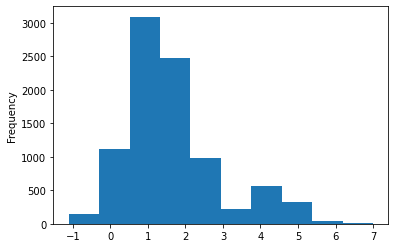

In [ ]:
df.mag.plot(kind = 'hist')

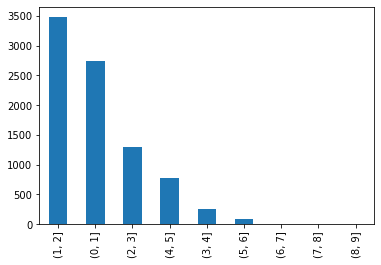

In [ ]:
abc = df.assign(
    mag_bin = lambda x: pd.cut(x.mag, range(0,10))
).mag_bin.value_counts()
abc.plot(kind = 'bar')

In [ ]:
df.groupby('magType').mag.mean()

magType
Mi       6.600000
mb       4.458364
mb_lg    2.640000
md       1.425961
mh       0.148333
ml       1.243408
mlv      2.351790
mw       4.132857
mwr      4.444444
mww      5.414607
Name: mag, dtype: float64

In [ ]:
pd.crosstab(df.tsunami, df.magType, values = df.mag, aggfunc='mean')

magType,Mi,mb,mb_lg,md,mh,ml,mlv,mw,mwr,mww
tsunami,,,,,,,,,,
0,NaN,4.45794,2.64,1.425961,0.148333,1.24275,2.35179,4.106667,4.447059,5.381395
1,6.6,4.80000,NaN,NaN,NaN,4.70000,NaN,4.290000,4.400000,6.366667


In [ ]:
covid = pd.read_csv('cases_deaths_w_cont.csv')

In [ ]:
covid.head()

,Unnamed: 0,location,date,iso_code,continent,total_cases,new_cases,reproduction_rate,population,population_density,...,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,new_deaths,total_deaths,rate,inst_rate,d_per_density,d_per_p
0,0,Afghanistan,2020-03-31,AFG,Asia,166.0,5.433333,1.520000,40099462.0,54.422,...,9.59,0.5,64.83,0.511,0.444444,4.0,0.024096,0.081800,0.008167,1.108355e-08
1,1,Afghanistan,2020-04-30,AFG,Asia,1827.0,55.366667,1.504333,40099462.0,54.422,...,9.59,0.5,64.83,0.511,1.866667,60.0,0.032841,0.033715,0.034300,4.655092e-08
2,2,Afghanistan,2020-05-31,AFG,Asia,15180.0,430.741935,1.448710,40099462.0,54.422,...,9.59,0.5,64.83,0.511,6.258065,254.0,0.016733,0.014529,0.114991,1.560636e-07
3,3,Afghanistan,2020-06-30,AFG,Asia,31445.0,542.166667,0.973000,40099462.0,54.422,...,9.59,0.5,64.83,0.511,16.166667,739.0,0.023501,0.029819,0.297061,4.031642e-07
4,4,Afghanistan,2020-07-31,AFG,Asia,36628.0,167.193548,0.774194,40099462.0,54.422,...,9.59,0.5,64.83,0.511,17.290323,1275.0,0.034809,0.103415,0.317708,4.311859e-07


In [ ]:
covid = covid.set_index(['location','date'])

In [ ]:
covid.groupby('location').new_cases.sum().apply(lambda x: int((30*x)))

location
Afghanistan            190497
Albania                332939
Algeria                266360
Andorra                 47491
Angola                 102061
                       ...   
Venezuela              540401
Vietnam              13442264
Wallis and Futuna         729
Zambia                 334180
Zimbabwe               250343
Name: new_cases, Length: 206, dtype: int64

In [ ]:
covid.head()

Unnamed: 0 iso_code continent  total_cases  \
location    date                                                     
Afghanistan 2020-03-31           0      AFG      Asia        166.0   
            2020-04-30           1      AFG      Asia       1827.0   
            2020-05-31           2      AFG      Asia      15180.0   
            2020-06-30           3      AFG      Asia      31445.0   
            2020-07-31           4      AFG      Asia      36628.0   

                         new_cases  reproduction_rate  population  \
location    date                                                    
Afghanistan 2020-03-31    5.433333           1.520000  40099462.0   
            2020-04-30   55.366667           1.504333  40099462.0   
            2020-05-31  430.741935           1.448710  40099462.0   
            2020-06-30  542.166667           0.973000  40099462.0   
            2020-07-31  167.193548           0.774194  40099462.0   

                        population_density  median_age  aged_65_older  ...  \
location    date                                                       ...   
Afghanistan 2020-03-31              54.422        18.6          2.581  ...   
            2020-04-30              54.422        18.6          2.581  ...   
            2020-05-31              54.422        18.6          2.581  ...   
            2020-06-30              54.422        18.6          2.581  ...   
            2020-07-31              54.422        18.6          2.581  ...   

                        diabetes_prevalence  hospital_beds_per_thousand  \
location    date                                                          
Afghanistan 2020-03-31                 9.59                         0.5   
            2020-04-30                 9.59                         0.5   
            2020-05-31                 9.59                         0.5   
            2020-06-30                 9.59                         0.5   
            2020-07-31                 9.59                         0.5   

                        life_expectancy  human_development_index  new_deaths  \
location    date                                                               
Afghanistan 2020-03-31            64.83                    0.511    0.444444   
            2020-04-30            64.83                    0.511    1.866667   
            2020-05-31            64.83                    0.511    6.258065   
            2020-06-30            64.83                    0.511   16.166667   
            2020-07-31            64.83                    0.511   17.290323   

                        total_deaths      rate  inst_rate  d_per_density  \
location    date                                                           
Afghanistan 2020-03-31           4.0  0.024096   0.081800       0.008167   
            2020-04-30          60.0  0.032841   0.033715       0.034300   
            2020-05-31         254.0  0.016733   0.014529       0.114991   
            2020-06-30         739.0  0.023501   0.029819       0.297061   
            2020-07-31        1275.0  0.034809   0.103415       0.317708   

                             d_per_p  
location    date                      
Afghanistan 2020-03-31  1.108355e-08  
            2020-04-30  4.655092e-08  
            2020-05-31  1.560636e-07  
            2020-06-30  4.031642e-07  
            2020-07-31  4.311859e-07  

[5 rows x 23 columns]

In [ ]:
#covid.melt(id_vars = ['location','date'],value_vars = )

## WHO dataset

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download utkarshxy/who-worldhealth-statistics-2020-complete
! unzip who-worldhealth-statistics-2020-complete.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
who-worldhealth-statistics-2020-complete.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  who-worldhealth-statistics-2020-complete.zip
replace 30-70cancerChdEtc.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 30-70cancerChdEtc.csv   
  inflating: HALElifeExpectancyAtBirth.csv  
  inflating: HALeWHOregionLifeExpectancyAtBirth.csv  
  inflating: WHOregionLifeExpectancyAtBirth.csv  
  inflating: adolescentBirthRate.csv  
  inflating: airPollutionDeathRate.csv  
  inflating: alcoholSubstanceAbuse.csv  
  inflating: atLeastBasicSanitizationServices.csv  
  inflating: basicDrinkingWaterServices.csv  
  inflating: basicHandWashing.csv    
  inflating: birthAttendedBySkilledPersonal.csv  
  inflating: cleanFuelAndTech.csv    
  inflating: crudeSuicideRates.csv   
  inflating: data

In [ ]:
import pandas as pd
pd.read_csv('uhcCoverage.csv')

,Location,Indicator,Period,First Tooltip
0,Afghanistan,UHC index of essential service coverage,2017,37
1,Afghanistan,UHC index of essential service coverage,2015,34
2,Albania,UHC index of essential service coverage,2017,59
3,Albania,UHC index of essential service coverage,2015,58
4,Algeria,UHC index of essential service coverage,2017,78
...,...,...,...,...
361,Yemen,UHC index of essential service coverage,2015,40
362,Zambia,UHC index of essential service coverage,2017,53
363,Zambia,UHC index of essential service coverage,2015,54
364,Zimbabwe,UHC index of essential service coverage,2017,54


In [ ]:
import glob
files = glob.glob("./*.csv")

In [ ]:
import pandas as pd
content = []

for filename in files:
  try:
    df = pd.read_csv(filename, index_col = None)
    if 'Afghanistan' not in df['Location'].unique():
      continue
    indices = df.groupby('Location').Period.transform('idxmax').unique()
    content.append(df.loc[indices].pivot(
    index = 'Location',
    columns = 'Indicator',
    values = 'First Tooltip'
            )
    ).reset_index()
  except:
    continue

In [ ]:
len(content)

32

In [ ]:
from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left,right, on=["Location"], how = 'outer'), content)

In [ ]:
df_merged

Indicator,"Pharmacists (per 10,000)","Nursing and midwifery personnel (per 10,000)",Population using at least basic sanitation services (%),Population with basic handwashing facilities at home (%),Life expectancy at birth (years),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Malaria incidence (per 1 000 population at risk),Total (recorded+unrecorded) alcohol per capita (15+) consumption,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Married or in-union women of reproductive age who have their need for family planning satisfied with modern methods (%),...,Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),New HIV infections (per 1000 uninfected population),Ambient and household air pollution attributable death rate (per 100 000 population),Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),"Medical doctors (per 10,000)",Reported number of people requiring interventions against NTDs,Crude suicide rates (per 100 000 population),"Dentists (per 10,000)",Births attended by skilled health personnel (%)
Location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.47,1.76,43.42,37.75,63.21,60.27 [47.44-74.62],29.01,0.21,14.63,42.1,...,0.5 [0.29-0.78],62.0,0.04 [0.01-0.15],95.12 [85.12-104.3],2.01,2.78,14834701.0,0.0,0.034,58.8
Albania,8.41,36.50,97.72,NaN,78.00,9.68 [9.07-10.35],NaN,7.17,16.72,12.9,...,1.29 [0.83-1.91],15.9,0.03,104.7 [70.26-147.3],4.95,12.16,47.0,0.0,3.380,99.8
Algeria,4.45,15.48,87.59,83.74,77.13,23.26 [22.51-24.03],0.00,0.95,NaN,77.2,...,0.22 [0.12-0.34],9.7,0.05 [0.01-0.1],40.33 [31.34-70],NaN,17.19,10909.0,0.0,3.660,96.6
Andorra,10.13,40.13,100.00,NaN,NaN,2.97 [0.85-10.97],NaN,11.02,NaN,NaN,...,0.08 [0-1.65],2.7,NaN,NaN,NaN,33.33,0.0,NaN,8.210,100.0
Angola,0.49,4.08,49.88,26.66,63.06,74.69 [34.55-139.3],228.90,6.94,12.38,24.2,...,4.85 [3.29-6.81],163.0,0.84 [0.59-1.12],67.25 [57.83-76.43],4.54,2.15,15220708.0,0.0,0.120,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
India (until 1975),NaN,NaN,NaN,NaN,NaN,199 [190.7-208],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kiribati (until 1984),NaN,NaN,NaN,NaN,NaN,118.2 [101.1-138.3],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Viet Nam (former),NaN,NaN,NaN,NaN,NaN,75.05 [68.17-82.77],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
! kaggle datasets download daniboy370/world-data-by-country-2020
! unzip "world-data-by-country-2020.zip"

world-data-by-country-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  world-data-by-country-2020.zip
replace Fertility.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fertility.csv           
  inflating: GDP per capita.csv      
  inflating: Life expectancy.csv     
  inflating: Meat consumption.csv    
  inflating: Median age.csv          
  inflating: Population growth.csv   
  inflating: Sex-ratio.csv           
  inflating: Suicide rate.csv        
  inflating: Urbanization rate.csv   


In [ ]:
fert = pd.read_csv('Fertility.csv')

In [ ]:
fert

,Country,Fertility,ISO-code
0,Afghanistan,4.5,AFG
1,Albania,1.6,ALB
2,Algeria,3.0,DZA
3,Andorra,1.3,AND
4,Angola,5.5,AGO
...,...,...,...
196,Vietnam,2.0,VNM
197,Virgin Islands,2.1,VIR
198,Yemen,3.8,YEM
199,Zambia,4.6,ZMB


In [ ]:
df = pd.merge(fert[['Country','ISO-code']],df_merged.reset_index().rename(columns={'Location':'Country'}),on=['Country'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 34 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Country                                                                                                                                        162 non-null    object 
 1   ISO-code                                                                                                                                       162 non-null    object 
 2   Pharmacists  (per 10,000)                                                                                                                      157 non-null    float64
 3   Nursing and midwifery personne

In [ ]:
df.head()

,Country,ISO-code,"Pharmacists (per 10,000)","Nursing and midwifery personnel (per 10,000)",Population using at least basic sanitation services (%),Population with basic handwashing facilities at home (%),Life expectancy at birth (years),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Malaria incidence (per 1 000 population at risk),Total (recorded+unrecorded) alcohol per capita (15+) consumption,...,Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),New HIV infections (per 1000 uninfected population),Ambient and household air pollution attributable death rate (per 100 000 population),Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),"Medical doctors (per 10,000)",Reported number of people requiring interventions against NTDs,Crude suicide rates (per 100 000 population),"Dentists (per 10,000)",Births attended by skilled health personnel (%)
0,Afghanistan,AFG,0.47,1.76,43.42,37.75,63.21,60.27 [47.44-74.62],29.01,0.21,...,0.5 [0.29-0.78],62.0,0.04 [0.01-0.15],95.12 [85.12-104.3],2.01,2.78,14834701.0,0.0,0.034,58.8
1,Albania,ALB,8.41,36.50,97.72,NaN,78.00,9.68 [9.07-10.35],NaN,7.17,...,1.29 [0.83-1.91],15.9,0.03,104.7 [70.26-147.3],4.95,12.16,47.0,0.0,3.380,99.8
2,Algeria,DZA,4.45,15.48,87.59,83.74,77.13,23.26 [22.51-24.03],0.00,0.95,...,0.22 [0.12-0.34],9.7,0.05 [0.01-0.1],40.33 [31.34-70],NaN,17.19,10909.0,0.0,3.660,96.6
3,Andorra,AND,10.13,40.13,100.00,NaN,NaN,2.97 [0.85-10.97],NaN,11.02,...,0.08 [0-1.65],2.7,NaN,NaN,NaN,33.33,0.0,NaN,8.210,100.0
4,Angola,AGO,0.49,4.08,49.88,26.66,63.06,74.69 [34.55-139.3],228.90,6.94,...,4.85 [3.29-6.81],163.0,0.84 [0.59-1.12],67.25 [57.83-76.43],4.54,2.15,15220708.0,0.0,0.120,46.6


In [ ]:
float("60.27".split(' ')[0])

60.27

In [ ]:
float("60.27 [47.44-74.62]".split(' ')[0])

60.27

In [ ]:
for col in df.columns:
  try:
    df.loc[:,col] = df[col].apply(lambda value: float(str(value).split(' ')[0]))
  except:
    continue

In [ ]:
df.head()

,Country,ISO-code,"Pharmacists (per 10,000)","Nursing and midwifery personnel (per 10,000)",Population using at least basic sanitation services (%),Population with basic handwashing facilities at home (%),Life expectancy at birth (years),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Malaria incidence (per 1 000 population at risk),Total (recorded+unrecorded) alcohol per capita (15+) consumption,...,Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),New HIV infections (per 1000 uninfected population),Ambient and household air pollution attributable death rate (per 100 000 population),Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),"Medical doctors (per 10,000)",Reported number of people requiring interventions against NTDs,Crude suicide rates (per 100 000 population),"Dentists (per 10,000)",Births attended by skilled health personnel (%)
0,Afghanistan,AFG,0.47,1.76,43.42,37.75,63.21,60.27,29.01,0.21,...,0.50,62.0,0.04 [0.01-0.15],95.12,2.01,2.78,14834701.0,0.0,0.034,58.8
1,Albania,ALB,8.41,36.50,97.72,NaN,78.00,9.68,NaN,7.17,...,1.29,15.9,0.03,104.70,4.95,12.16,47.0,0.0,3.380,99.8
2,Algeria,DZA,4.45,15.48,87.59,83.74,77.13,23.26,0.00,0.95,...,0.22,9.7,0.05 [0.01-0.1],40.33,NaN,17.19,10909.0,0.0,3.660,96.6
3,Andorra,AND,10.13,40.13,100.00,NaN,NaN,2.97,NaN,11.02,...,0.08,2.7,NaN,NaN,NaN,33.33,0.0,NaN,8.210,100.0
4,Angola,AGO,0.49,4.08,49.88,26.66,63.06,74.69,228.90,6.94,...,4.85,163.0,0.84 [0.59-1.12],67.25,4.54,2.15,15220708.0,0.0,0.120,46.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 34 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Country                                                                                                                                        162 non-null    object 
 1   ISO-code                                                                                                                                       162 non-null    object 
 2   Pharmacists  (per 10,000)                                                                                                                      157 non-null    float64
 3   Nursing and midwifery personne

In [ ]:
df['New HIV infections (per 1000 uninfected population)'].unique()

array(['0.04 [0.01-0.15]', '0.03', '0.05 [0.01-0.1]', nan,
       '0.84 [0.59-1.12]', '0.13 [0.1-0.19]', '0.05 [0.03-0.09]',
       '0.03 [0.02-0.06]', 'No data', '0.06 [0.03-0.09]', '0.18',
       '0.2 [0.13-0.33]', '0.31 [0.15-0.62]', '4.78 [4.01-5.68]',
       '0.23 [0.11-0.34]', '0.04 [0.03-0.05]', '0.14 [0.09-0.21]',
       '0.17 [0.1-0.26]', '0.05 [0.04-0.05]', '0.69 [0.56-0.85]',
       '1.1 [0.64-1.86]', '0.34 [0.21-0.5]', '0.27 [0.21-0.33]',
       '0.25 [0.17-0.39]', '<0.01 [<0.01–0.02]', '0.19 [0.14-0.25]',
       '0.02', '0.14 [0.08-0.24]', '0.22 [0.14-0.33]', '0.14 [0.07-0.29]',
       '0.27 [0.16-0.36]', '0.14 [0.08-0.29]', '0.05 [0.04-0.07]',
       '0.14 [0.11-0.21]', '4.06 [2.21-7.28]', '0.11 [0.05-0.21]',
       '4.9 [3.81-6.2]', '0.16 [0.08-0.27]', '0.14 [0.07-0.34]',
       '0.74 [0.35-1.32]', '0.7 [0.35-1.29]', '0.07 [0.05-0.11]',
       '0.39 [0.28-0.54]', '0.42 [0.34-0.54]', '0.52 [0.38-0.69]',
       '0.11 [0.08-0.17]', '0.04 [0.01-0.13]', '0.58 [0.39-0.98]',
  

In [ ]:
df = df.drop(columns = ['New HIV infections (per 1000 uninfected population)'])

In [ ]:
df.set_index(['Country','ISO-code'])

,,"Pharmacists (per 10,000)","Nursing and midwifery personnel (per 10,000)",Population using at least basic sanitation services (%),Population with basic handwashing facilities at home (%),Life expectancy at birth (years),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Malaria incidence (per 1 000 population at risk),Total (recorded+unrecorded) alcohol per capita (15+) consumption,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Married or in-union women of reproductive age who have their need for family planning satisfied with modern methods (%),...,Healthy life expectancy (HALE) at birth (years),Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),Ambient and household air pollution attributable death rate (per 100 000 population),Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),"Medical doctors (per 10,000)",Reported number of people requiring interventions against NTDs,Crude suicide rates (per 100 000 population),"Dentists (per 10,000)",Births attended by skilled health personnel (%)
Country,ISO-code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.47,1.76,43.42,37.75,63.21,60.27,29.01,0.210,14.63,42.1,...,53.95,0.50,62.0,95.12,2.01,2.78,14834701.0,0.0,0.034,58.8
Albania,ALB,8.41,36.50,97.72,NaN,78.00,9.68,NaN,7.170,16.72,12.9,...,69.08,1.29,15.9,104.70,4.95,12.16,47.0,0.0,3.380,99.8
Algeria,DZA,4.45,15.48,87.59,83.74,77.13,23.26,0.00,0.950,NaN,77.2,...,66.39,0.22,9.7,40.33,NaN,17.19,10909.0,0.0,3.660,96.6
Andorra,AND,10.13,40.13,100.00,NaN,NaN,2.97,NaN,11.020,NaN,NaN,...,NaN,0.08,2.7,NaN,NaN,33.33,0.0,NaN,8.210,100.0
Angola,AGO,0.49,4.08,49.88,26.66,63.06,74.69,228.90,6.940,12.38,24.2,...,54.84,4.85,163.0,67.25,4.54,2.15,15220708.0,0.0,0.120,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,UZB,0.41,112.80,100.00,NaN,73.01,NaN,0.00,2.590,6.66,NaN,...,64.68,0.60,18.9,54.10,1.85,23.74,405951.0,0.0,1.490,100.0
Vanuatu,VUT,1.16,14.25,34.07,25.21,65.31,NaN,3.99,2.250,NaN,50.7,...,57.83,8.48,51.2,75.76,NaN,1.65,284095.0,0.0,0.300,89.4
Yemen,YEM,1.05,7.85,59.05,49.54,66.63,NaN,45.84,0.051,15.83,46.9,...,57.53,2.54,67.2,89.75,4.16,5.25,12339767.0,0.0,0.210,44.7


In [ ]:
df.describe()

,"Pharmacists (per 10,000)","Nursing and midwifery personnel (per 10,000)",Population using at least basic sanitation services (%),Population with basic handwashing facilities at home (%),Life expectancy at birth (years),Under-five mortality rate (probability of dying by age 5 per 1000 live births),Malaria incidence (per 1 000 population at risk),Total (recorded+unrecorded) alcohol per capita (15+) consumption,Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%),Married or in-union women of reproductive age who have their need for family planning satisfied with modern methods (%),...,Healthy life expectancy (HALE) at birth (years),Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),Ambient and household air pollution attributable death rate (per 100 000 population),Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%),"Medical doctors (per 10,000)",Reported number of people requiring interventions against NTDs,Crude suicide rates (per 100 000 population),"Dentists (per 10,000)",Births attended by skilled health personnel (%)
count,157.000000,161.000000,162.000000,85.000000,157.000000,147.000000,93.000000,158.000000,132.000000,104.000000,...,157.000000,162.000000,162.000000,157.000000,132.000000,161.000000,1.620000e+02,157.000000,160.000000,154.000000
mean,3.836089,43.863280,74.400000,51.238000,72.487962,28.609184,90.070699,5.844411,9.046212,55.574038,...,63.256369,1.551605,51.518519,69.875605,1.938030,18.570435,1.041753e+07,0.011465,3.535569,86.890260
std,4.120001,42.534645,29.725604,32.073354,7.398575,30.412420,132.521390,4.172863,8.046454,21.955215,...,6.452380,2.530777,46.852797,39.297398,2.616406,17.085875,5.675244e+07,0.056578,4.006378,19.717335
min,0.002000,0.058000,7.320000,1.190000,50.750000,1.680000,0.000000,0.003000,0.290000,5.600000,...,44.240000,0.010000,1.400000,12.840000,0.010000,0.230000,0.000000e+00,0.000000,0.003000,9.400000
25%,0.390000,11.660000,48.800000,21.220000,66.090000,5.585000,0.023000,2.067500,3.287500,39.375000,...,57.760000,0.240000,11.025000,38.740000,0.427500,3.090000,1.150000e+01,0.000000,0.210000,81.600000
50%,2.080000,29.460000,89.705000,50.540000,73.950000,15.590000,5.330000,5.675000,6.935000,56.250000,...,64.680000,0.565000,38.600000,62.260000,1.215000,14.210000,6.814300e+04,0.000000,1.870000,96.900000
75%,6.830000,64.280000,98.562500,82.500000,77.870000,42.410000,184.500000,9.040000,12.977500,75.225000,...,68.410000,1.815000,75.975000,95.470000,2.660000,29.810000,5.039262e+06,0.000000,6.550000,99.800000
max,19.070000,194.600000,100.000000,100.000000,84.260000,117.200000,486.500000,20.500000,54.200000,89.800000,...,74.090000,21.130000,229.000000,184.000000,22.160000,84.220000,6.970000e+08,0.500000,20.020000,100.000000


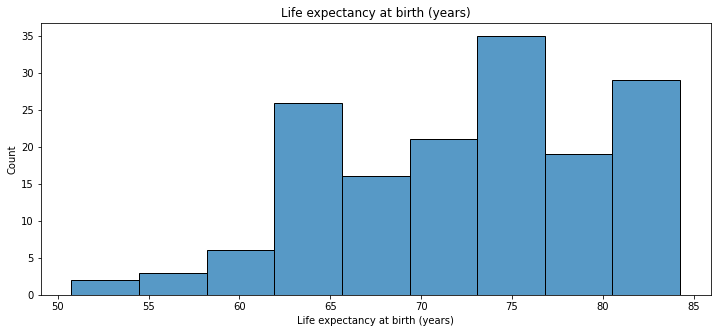

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.title("Life expectancy at birth (years)")
ax = sns.histplot(df["Life expectancy at birth (years)"])

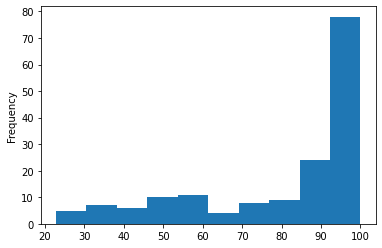

In [ ]:
df['Population using at least basic drinking-water services (%)'].plot(kind='hist')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 33 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   Country                                                                                                                                        162 non-null    object 
 1   ISO-code                                                                                                                                       162 non-null    object 
 2   Pharmacists  (per 10,000)                                                                                                                      157 non-null    float64
 3   Nursing and midwifery personne

In [ ]:
short_df = df.drop(columns = [col for col in df.columns if df[col].isna().any()])

In [ ]:
short_df.columns

Index(['Country', 'ISO-code',
       'Population using at least basic sanitation services (%)',
       'Incidence of tuberculosis (per 100 000 population per year)',
       'Population using at least basic drinking-water services (%)',
       'Neonatal mortality rate (per 1000 live births)',
       'Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%)',
       'Adolescent birth rate (per 1000 women aged 15-19 years)',
       'Reported number of people requiring interventions against NTDs'],
      dtype='object')

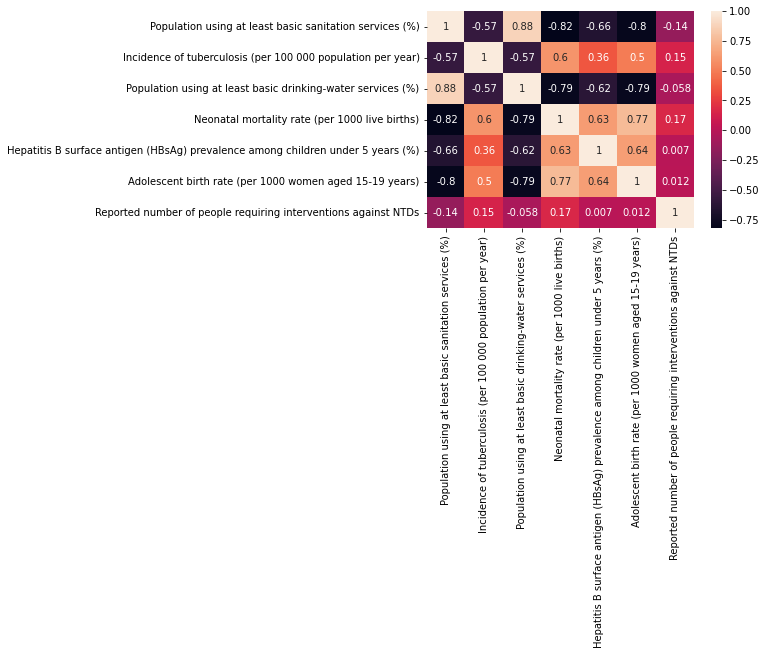

In [ ]:
sns.heatmap(short_df.corr(),annot=True)

In [ ]:
X = short_df.drop(columns=['Country','ISO-code'])

In [ ]:
len(X)

741

In [ ]:
X.head()

,Population using at least basic sanitation services (%),Incidence of tuberculosis (per 100 000 population per year),Population using at least basic drinking-water services (%),Neonatal mortality rate (per 1000 live births),Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),Reported number of people requiring interventions against NTDs
0,43.42,189.0,57.32,35.86,0.50,62.0,14834701.0
1,97.72,16.0,89.88,7.52,1.29,15.9,47.0
2,87.59,61.0,88.69,16.28,0.22,9.7,10909.0
3,100.00,7.5,100.00,1.43,0.08,2.7,0.0
4,49.88,351.0,27.44,27.57,4.85,163.0,15220708.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax_scaled = pd.DataFrame(minmax.fit_transform(X),columns = X.columns)

<BarContainer object of 7 artists>

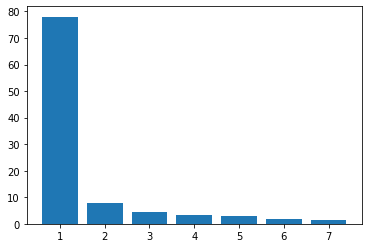

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(minmax_scaled)
pca.transform(minmax_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, 1)
plt.bar(range(1,len(per_var)+1),per_var)

In [ ]:
gdp = pd.read_csv("GDP per capita.csv")
len(gdp)

191

In [ ]:
gdp = pd.read_csv("GDP per capita.csv")
mod_df = pd.merge(short_df,gdp.drop(columns=['Country']),on="ISO-code")

In [ ]:
mod_X = mod_df.drop(columns = ['Country','ISO-code'])

<BarContainer object of 8 artists>

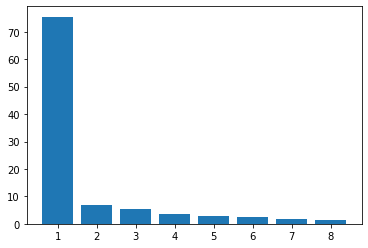

In [ ]:
minmax_scaled = pd.DataFrame(minmax.fit_transform(mod_X),columns = mod_X.columns)

pca.fit(minmax_scaled)
pca.transform(minmax_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, 1)
plt.bar(range(1,len(per_var)+1),per_var)

In [ ]:
minmax_scaled = pd.DataFrame(minmax.fit_transform(mod_X),columns = mod_X.columns)

from sklearn.cluster import KMeans
km = KMeans(
    n_clusters = 3
)
y_predicted = km.fit_predict(minmax_scaled)
y_predicted

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0,
       2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 2, 2], dtype=int32)

In [ ]:
minmax_scaled['cluster_3'] = y_predicted

In [ ]:
minmax_scaled

,Population using at least basic sanitation services (%),Incidence of tuberculosis (per 100 000 population per year),Population using at least basic drinking-water services (%),Neonatal mortality rate (per 1000 live births),Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years (%),Adolescent birth rate (per 1000 women aged 15-19 years),Reported number of people requiring interventions against NTDs,GDP per capita,cluster_3
0,0.389512,0.288991,0.446935,0.834642,0.023201,0.266257,2.128365e-02,0.016714,2
1,0.975399,0.024465,0.868861,0.160362,0.060606,0.063708,6.743185e-08,0.130237,1
2,0.866098,0.093272,0.853440,0.368784,0.009943,0.036467,1.565136e-05,0.141201,1
3,0.459215,0.536697,0.059738,0.637402,0.229167,0.710018,2.183746e-02,0.057715,2
4,0.865127,0.000000,0.957756,0.068285,0.017519,0.115554,1.723099e-06,0.270996,1
...,...,...,...,...,...,...,...,...,...
156,1.000000,0.102446,0.949073,0.217464,0.027936,0.076889,5.824261e-04,0.083061,1
157,0.288628,0.062691,0.850849,0.252439,0.401042,0.218805,4.075968e-04,0.024385,0
158,0.558157,0.073394,0.412984,0.615513,0.119792,0.289104,1.770411e-02,0.017878,0
159,0.205546,0.509174,0.247765,0.535332,0.086648,0.586995,1.726318e-02,0.034543,2


In [ ]:
minmax_scaled = pd.DataFrame(minmax.fit_transform(mod_X[['Neonatal mortality rate (per 1000 live births)','GDP per capita']]))
km = KMeans(
    n_clusters = 3
)
y_predicted = km.fit_predict(minmax_scaled)
y_predicted

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 2, 2, 0, 0, 0], dtype=int32)

In [ ]:
two_col = mod_X[['Neonatal mortality rate (per 1000 live births)','GDP per capita']]
two_col['3_clusters'] = y_predicted
two_col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neonatal mortality rate (per 1000 live births),GDP per capita,3_clusters
0,35.86,2182.0,0
1,7.52,14866.0,2
2,16.28,16091.0,2
3,27.57,6763.0,0
4,3.65,30593.0,2
...,...,...,...
156,9.92,9595.0,2
157,11.39,3039.0,2
158,26.65,2312.0,0
159,23.28,4174.0,0


In [ ]:
two_col[two_col['3_clusters'] == 1].head()

,Neonatal mortality rate (per 1000 live births),GDP per capita,3_clusters
7,2.28,54799.0,1
8,2.06,55171.0,1
10,2.94,51991.0,1
14,2.00,50904.0,1
26,3.33,52144.0,1


In [ ]:
km.inertia_

3.3582293203122084

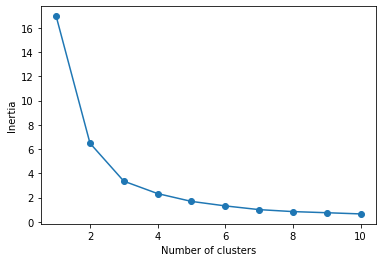

In [ ]:
inertias = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(minmax_scaled)
  inertias.append(km.inertia_)

plt.plot(range(1,11),inertias, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

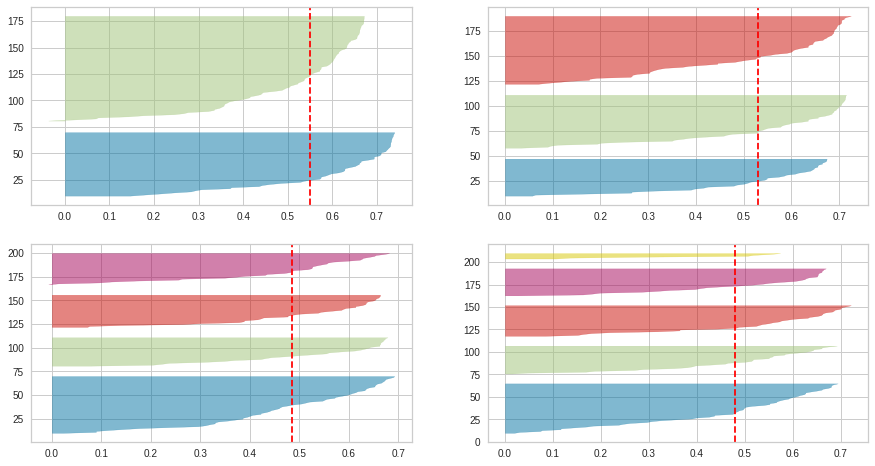

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2,3,4,5]:
  km = KMeans(n_clusters=i)
  if i == 2:
    j = 0
    k = 0
  elif i ==3:
    j = 0
    k = 1
  elif i == 4:
    j = 1
    k = 0
  elif i == 5:
    j = 1
    k = 1
  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[j][k])
  visualizer.fit(minmax_scaled)

In [ ]:
two_col

,Neonatal mortality rate (per 1000 live births),GDP per capita,3_clusters
0,35.86,2182.0,0
1,7.52,14866.0,2
2,16.28,16091.0,2
3,27.57,6763.0,0
4,3.65,30593.0,2
...,...,...,...
156,9.92,9595.0,2
157,11.39,3039.0,2
158,26.65,2312.0,0
159,23.28,4174.0,0


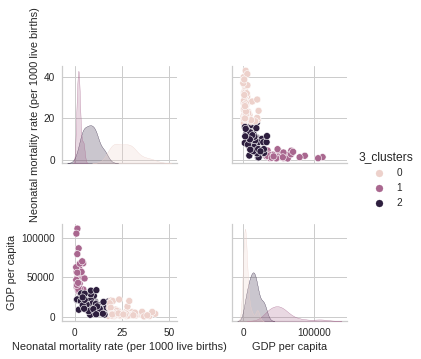

In [ ]:
sns.pairplot(two_col,hue='3_clusters')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


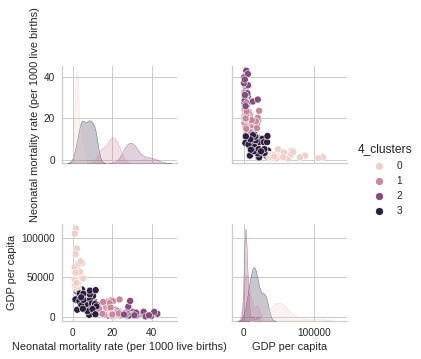

In [ ]:
minmax_scaled = pd.DataFrame(minmax.fit_transform(mod_X[['Neonatal mortality rate (per 1000 live births)','GDP per capita']]))
km = KMeans(
    n_clusters = 4
)
y_predicted = km.fit_predict(minmax_scaled)
two_col = mod_X[['Neonatal mortality rate (per 1000 live births)','GDP per capita']]
two_col['4_clusters'] = y_predicted
sns.pairplot(two_col,hue='4_clusters')